In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
df=pd.read_csv(r"E:\fliprobo technologies\projects\world happiness report.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


as deccribed in the problem statement we have to predict happiness score , so happiness score is our target, and it is continous data so it is a Rregression problem

# shape of dataset

In [3]:
print('total rows-',df.shape[0])
print('total columns-',df.shape[1])

total rows- 158
total columns- 12


There are total 158 rows and 12 columns out of which 1 is target variable and remaining 11 are independent variables(features)

In [4]:
# checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

country and Region are object datatype,Happiness Rank have int datatype,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual columns have float datatype

there are no null values present in any columns

In [5]:
# checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

here are no null values present in any columns

# checking duplicates

In [6]:
df.duplicated().sum()

0

there are no duplicate values present in any columns

# graphical analysis

Text(0, 0.5, 'GDP per capita')

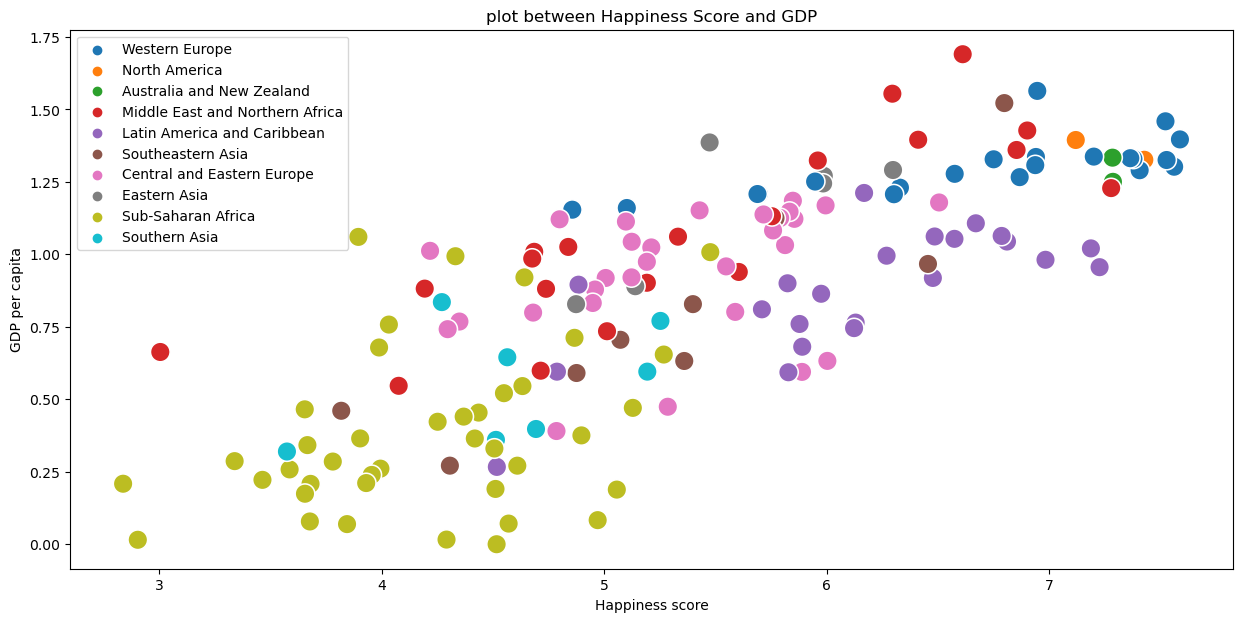

In [7]:
# plot b/w happiness and GDP

plt.rcParams['figure.figsize']=(15,7)
plt.title('plot between Happiness Score and GDP')
sns.scatterplot(x=df['Happiness Score'],y=df['Economy (GDP per Capita)'],hue=df.Region,s=200)
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')

we observed that as the GDP increases happiness score also increases

In [8]:
# total countries in every region
total_country=df.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


In [9]:
gdp_region=df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

<AxesSubplot:ylabel='Economy (GDP per Capita)'>

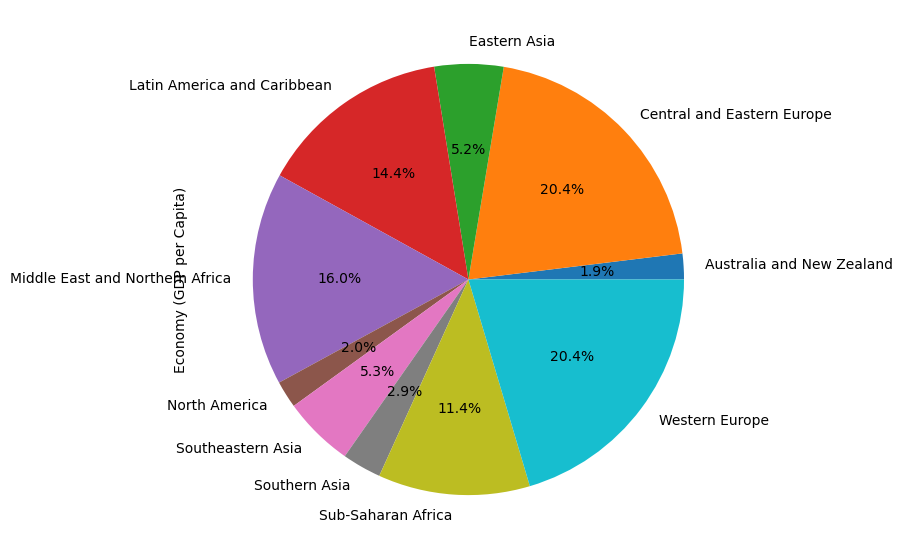

In [10]:
gdp_region.plot.pie(autopct='%1.1f%%')

 western Europe and Central and Eastern Europe countries have high GDP

# checking correlation

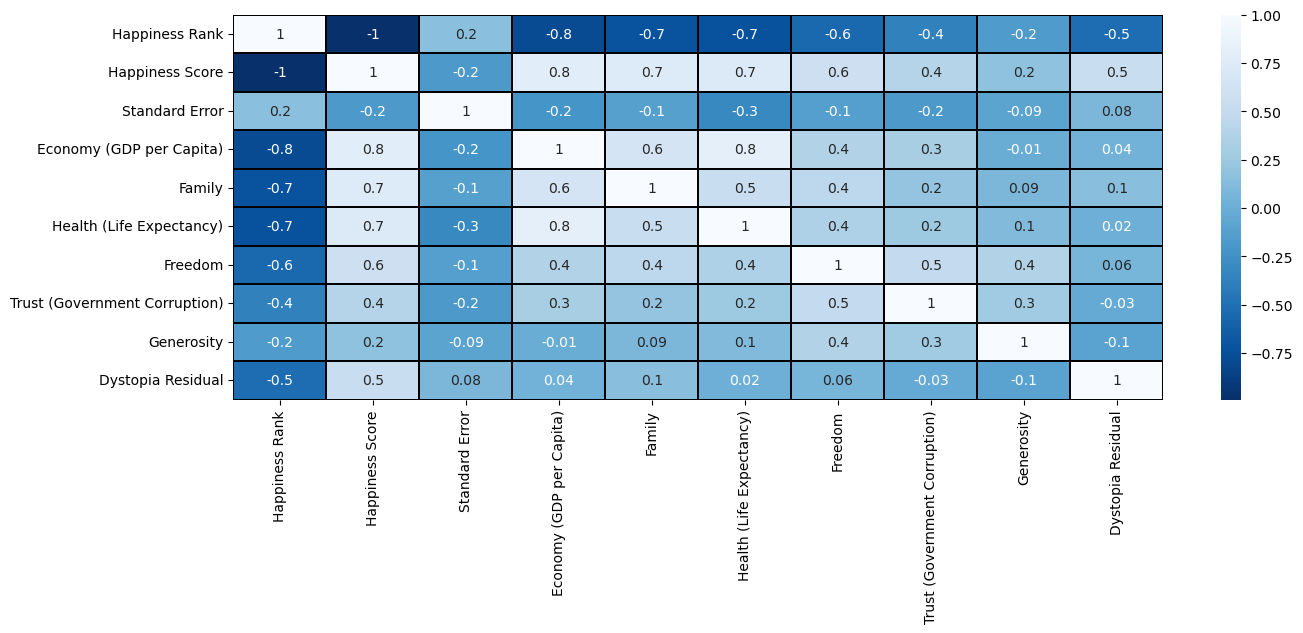

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

Economy ,family,health,freedom,Dystopia Residual have high correlation with target Happiness score  
features also correlated with each other so multicolinearity also present

# checking distribution

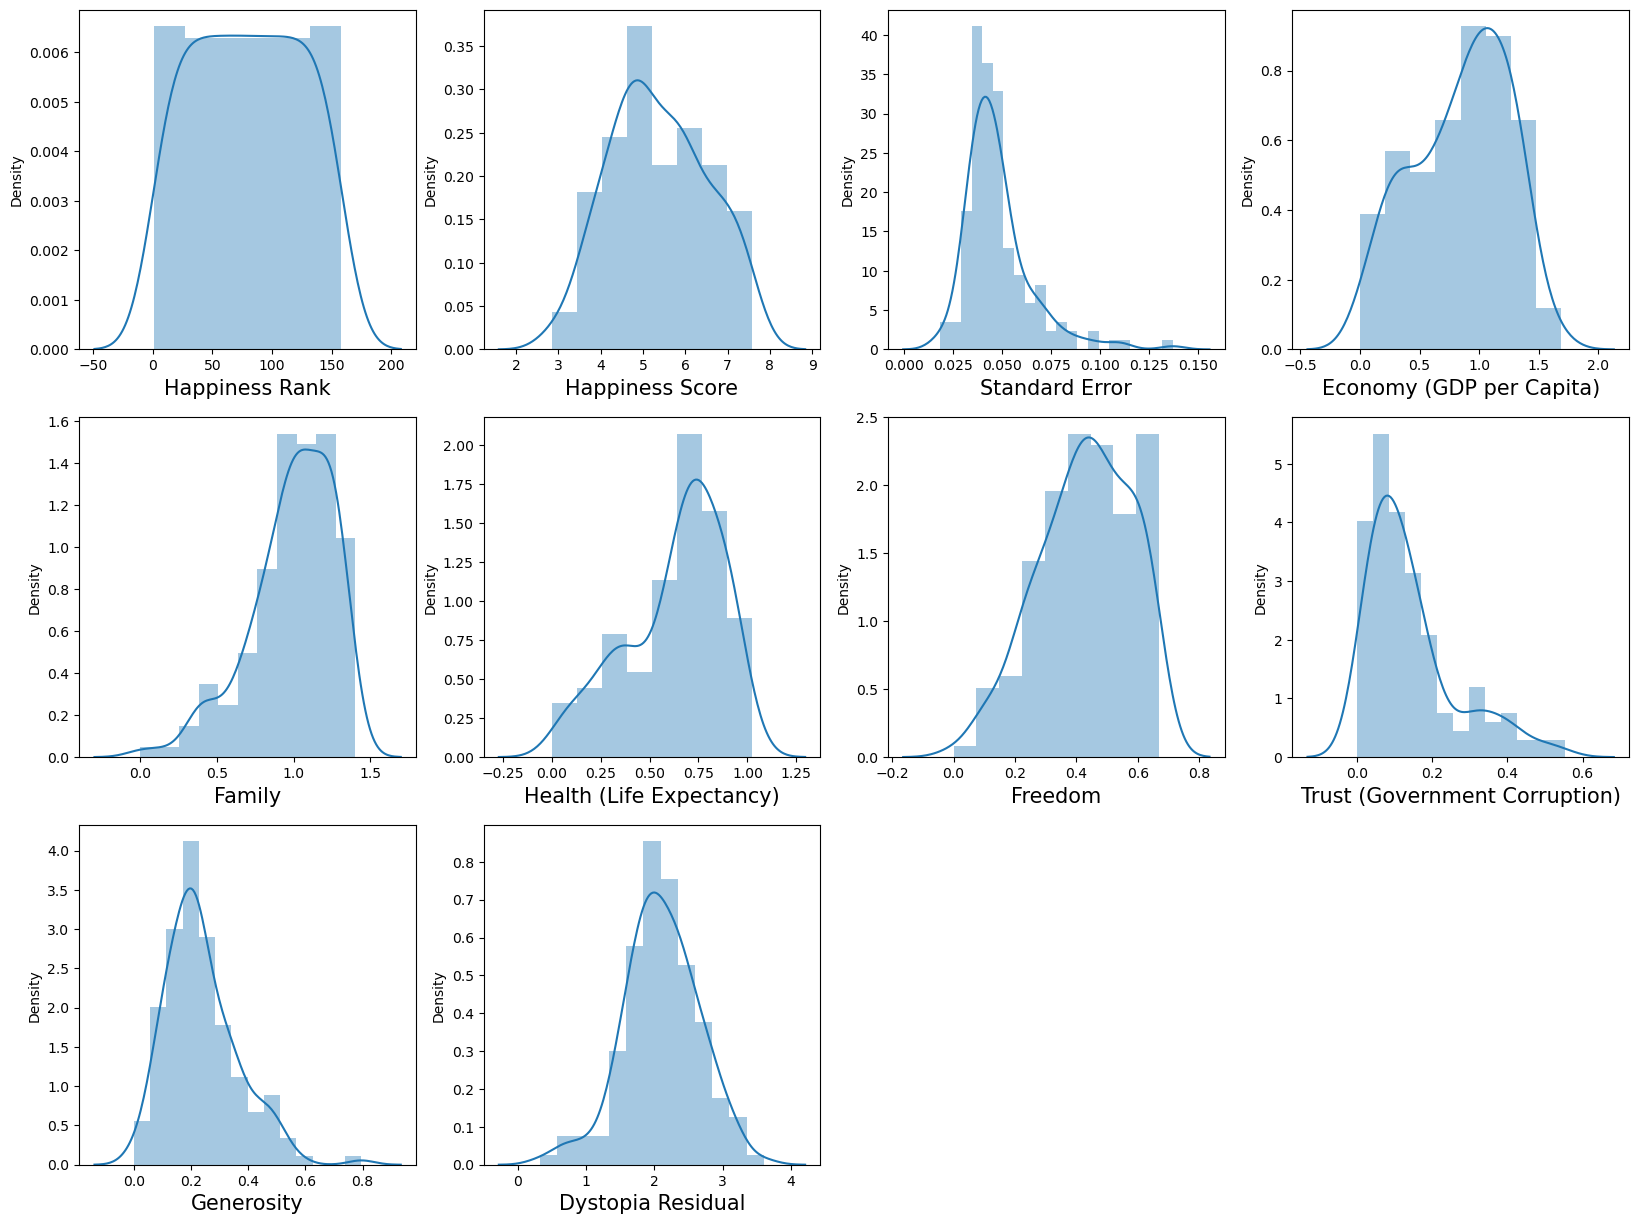

In [12]:
plt.figure(figsize=(20,15))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=15:
            plt.subplot(3,4,plot)
            sns.distplot(df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()    

data is normally distributed in alost all columns and skewness is also present littlebit

# Description of Dataset

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


count is same in all columns

# checking outliers in continous column

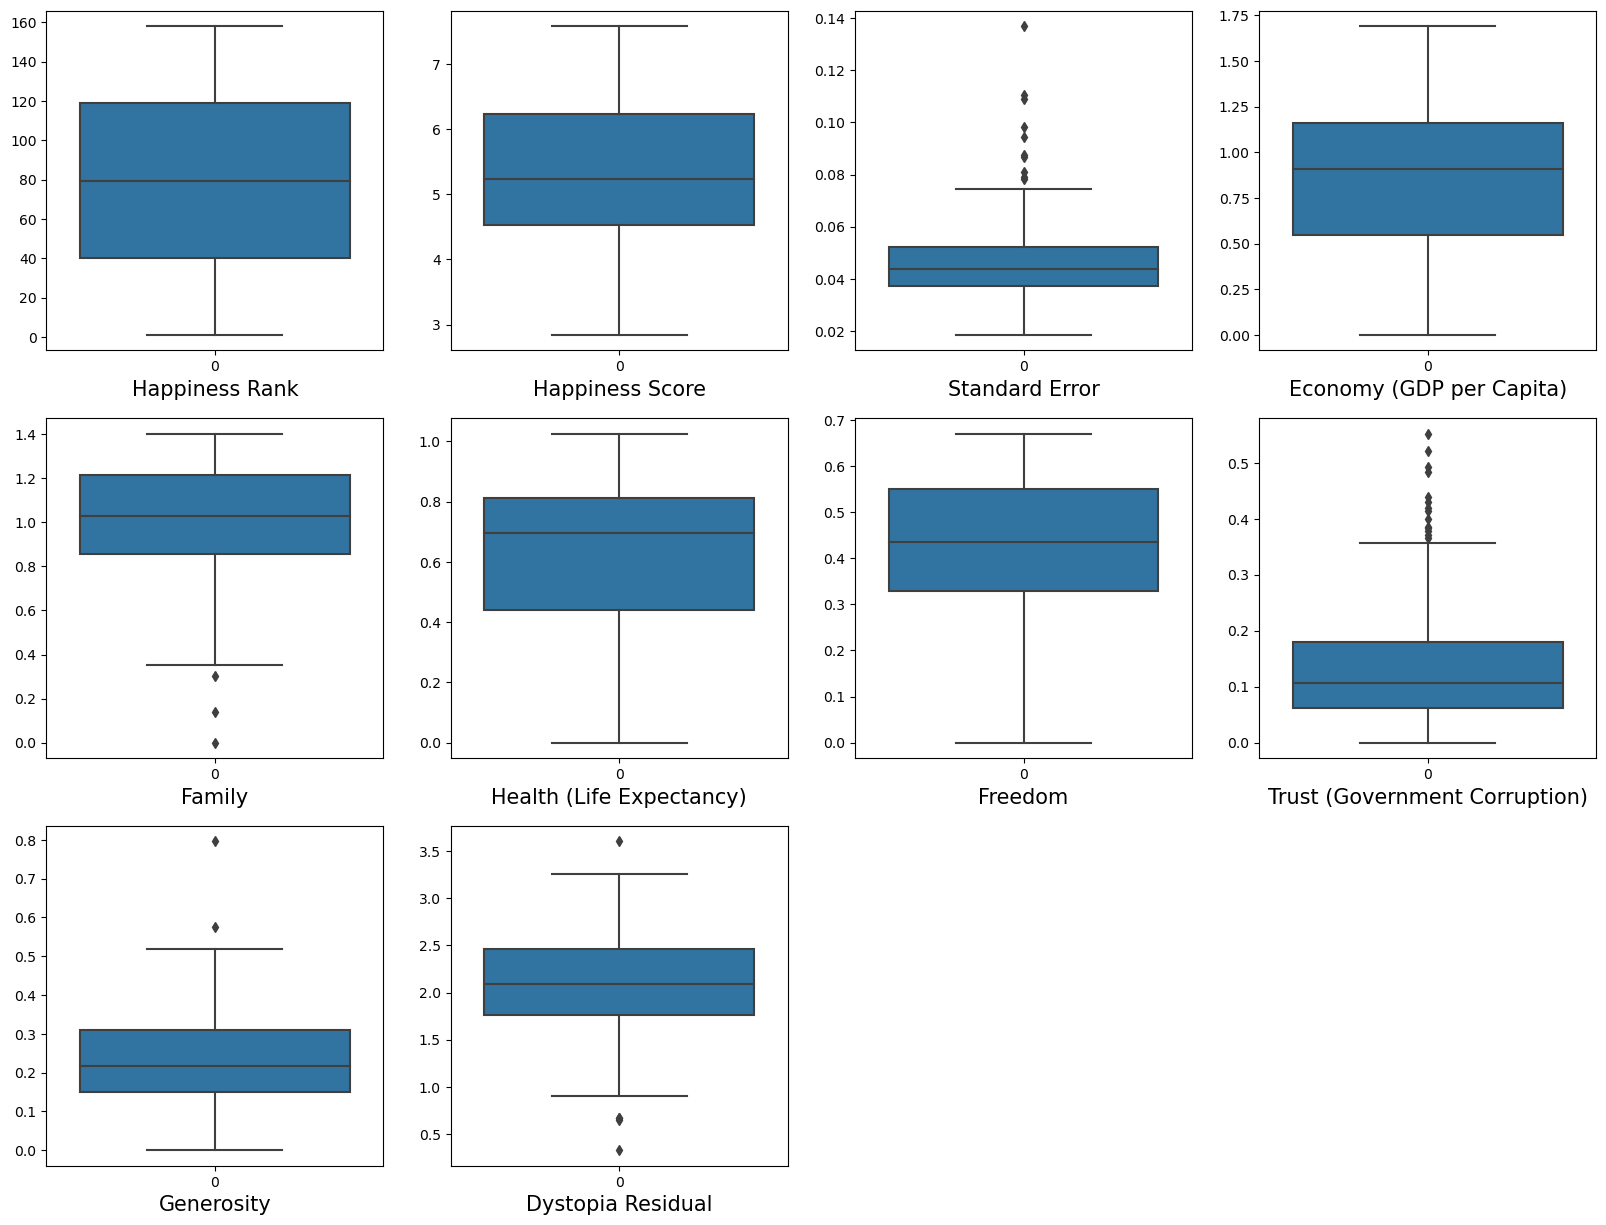

In [14]:
plt.figure(figsize=(20,15))
plot=1
for i in df:
    if df.dtypes[i] !='object':
        if plot<=15:
            plt.subplot(3,4,plot)
            sns.boxplot(data=df[i])
            plt.xlabel(i,fontsize=15)
        plot+=1
plt.show()

# Encoding categorical columns

In [15]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df  

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# removing outliers

In [16]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 12)

In [17]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [18]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(158, 12)
(149, 12)


# dataloss

In [19]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print(loss)

5.69620253164557


approx 6% data loss

## checking outliers removed or not

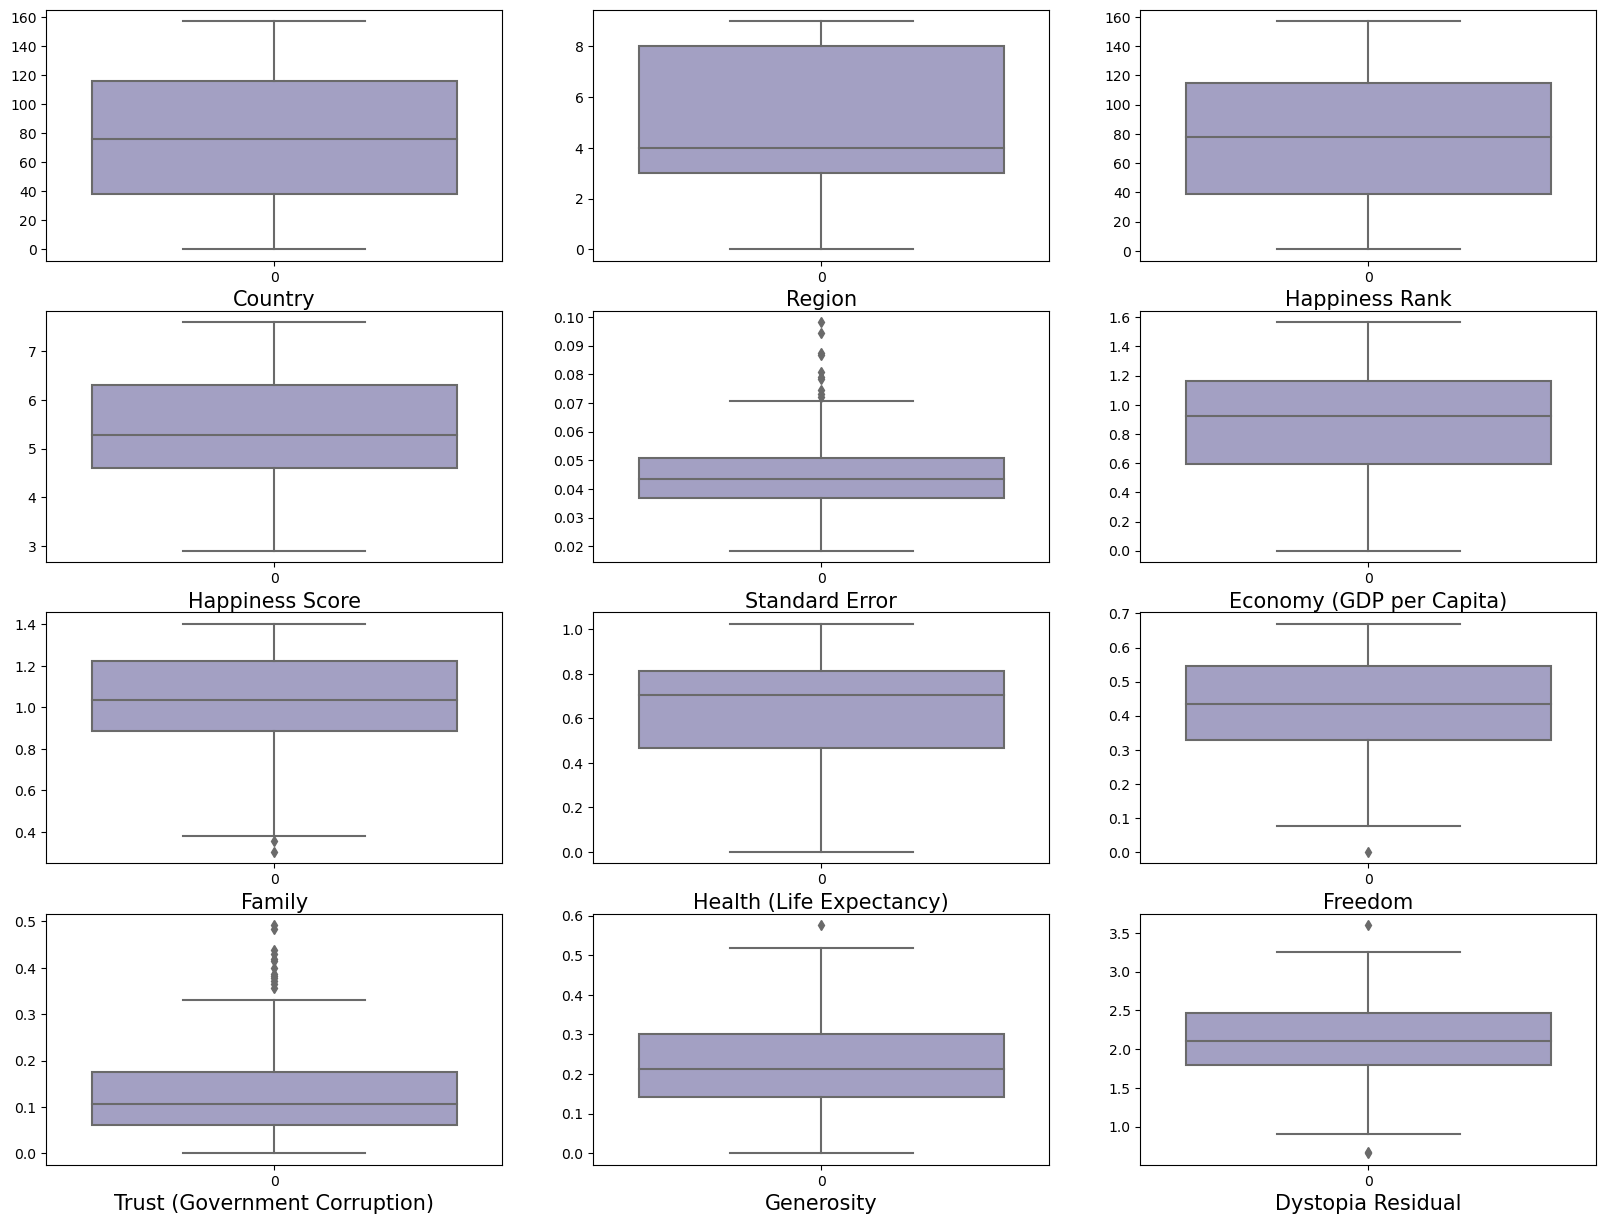

In [20]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber=1
for col in df1:
    if plotnumber<=14:
        ac=plt.subplot(4,3,plotnumber)
        sns.boxplot(data=df1[col],palette='Purples_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show() 

# checking skewness

In [21]:
df1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

# Removing skewness

In [22]:
import numpy as np

for i in df1.columns:
    if i != ["Country", "Region"]:
        if df1[i].skew() > 0.5 or df1[i].skew() < -0.5:
            df1[i] = np.cbrt(df[i])

In [23]:
df1.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -1.318995
Health (Life Expectancy)        -2.067331
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                      -1.087392
Dystopia Residual               -0.021144
dtype: float64

skewness is removed and some are not coming in acceptable range so we consider their skewness as it is.

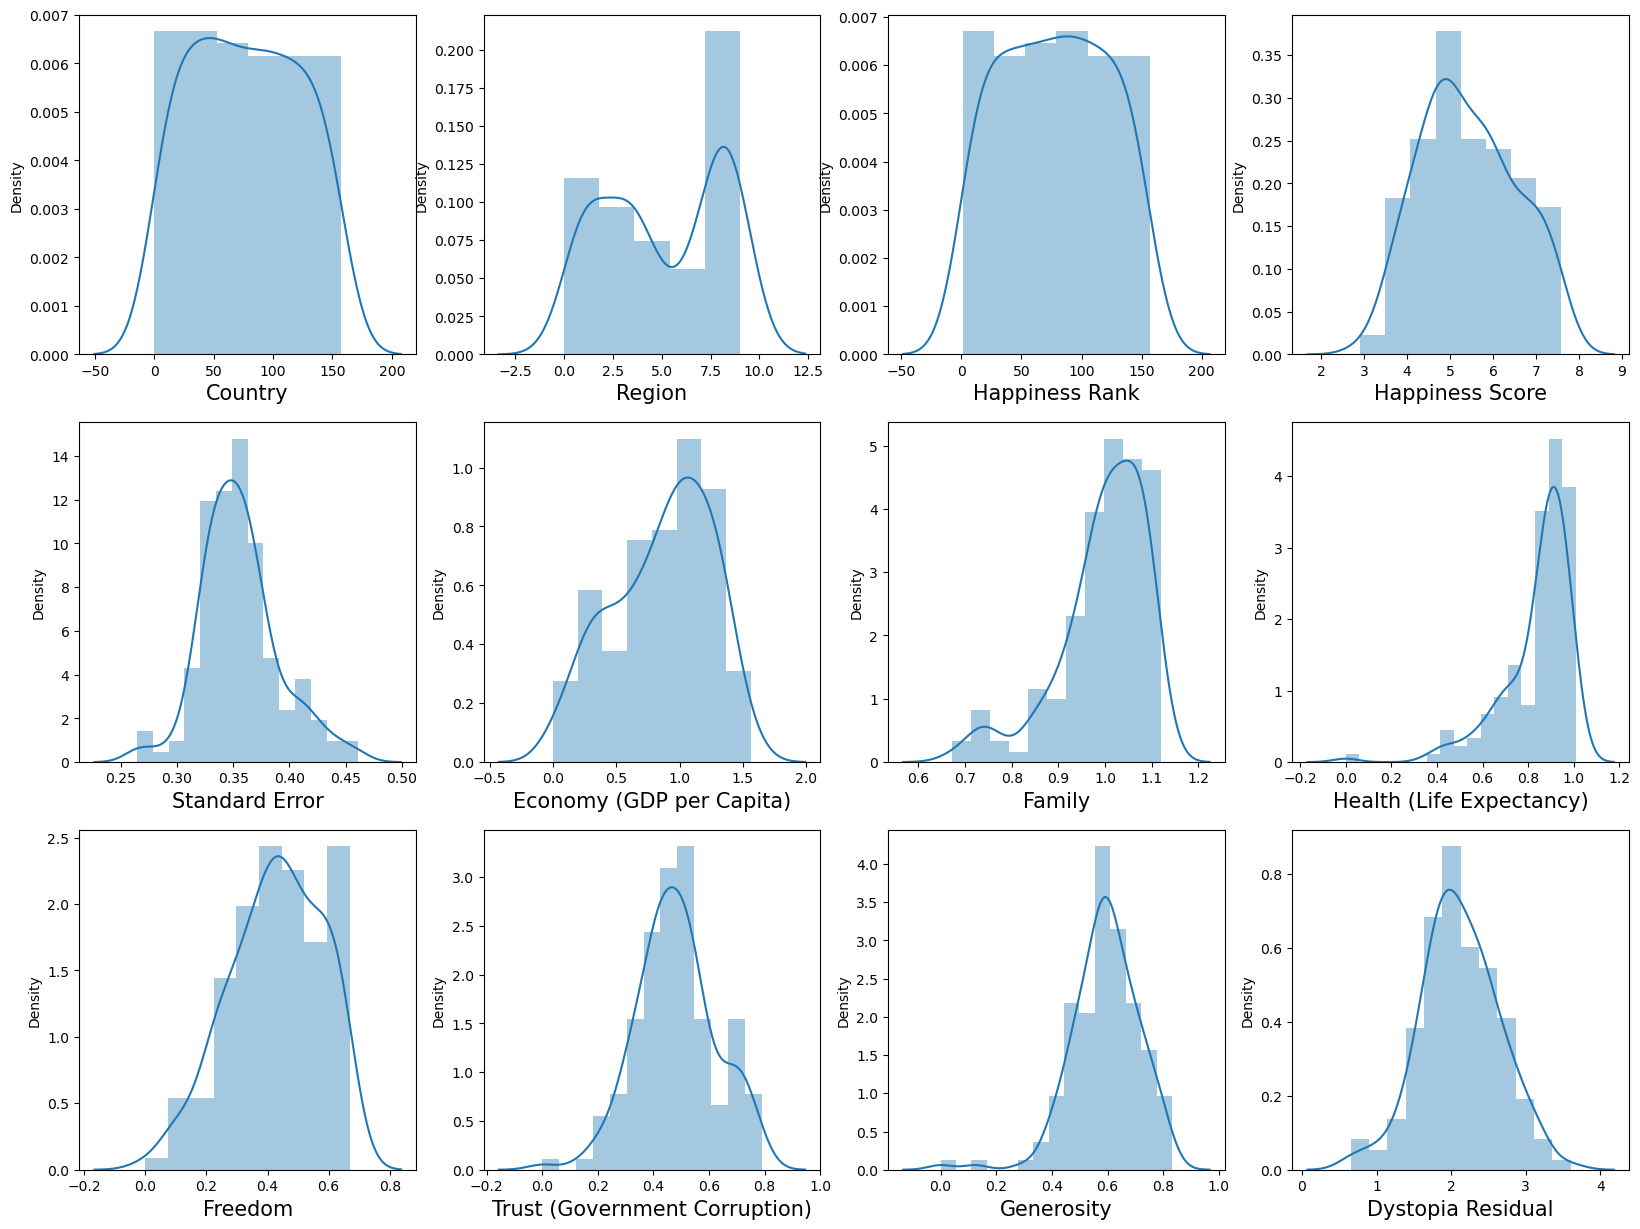

In [24]:
plt.figure(figsize=(20,15))
plot=1
for i in df1:
    if plot<=15:
        plt.subplot(3,4,plot)
        sns.distplot(df1[i])
        plt.xlabel(i,fontsize=15)
        plot+=1
plt.show() 

# seperating features and label

In [25]:
x=df1.drop("Happiness Score",axis=1)
y=df1["Happiness Score"]

# Feature Scaling using Standard Scalarization


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.268260,1.296837,-1.713905,-0.911097,1.381916,1.173892,0.937316,1.583704,1.886835,0.620101,0.756876
1,-0.417415,1.296837,-1.691535,0.289534,1.138324,1.324528,0.951923,1.338953,0.279412,1.374255,1.109300
2,-0.877145,1.296837,-1.669166,-0.988343,1.198220,1.205844,0.781010,1.476027,2.142033,0.883029,0.708507
3,0.611504,1.296837,-1.646796,-0.496623,1.543526,1.119928,0.806264,1.611371,1.646273,0.914382,0.657485
4,-1.161739,-0.026647,-1.624427,-0.781797,1.200315,1.095516,0.854489,1.366887,1.477326,1.476816,0.631620
...,...,...,...,...,...,...,...,...,...,...,...
144,-0.242280,0.965966,1.641542,0.473095,-1.026255,-0.820054,-2.001976,0.274090,0.581308,-0.044953,-1.343100
145,-1.249307,0.965966,1.663911,-0.134003,-1.562163,-0.491949,-1.252824,-0.216276,0.161899,0.078376,-1.252030
146,-1.687145,0.635095,1.686281,-1.223140,-1.402596,-3.422844,-1.090982,-1.285662,-0.153050,1.013522,-0.322135
147,-1.402550,0.965966,1.731020,-0.690149,-1.488379,-3.043626,-1.015732,0.379439,-0.355660,-0.202346,-0.930702


# visualizing the correlation between label and features using bar plot

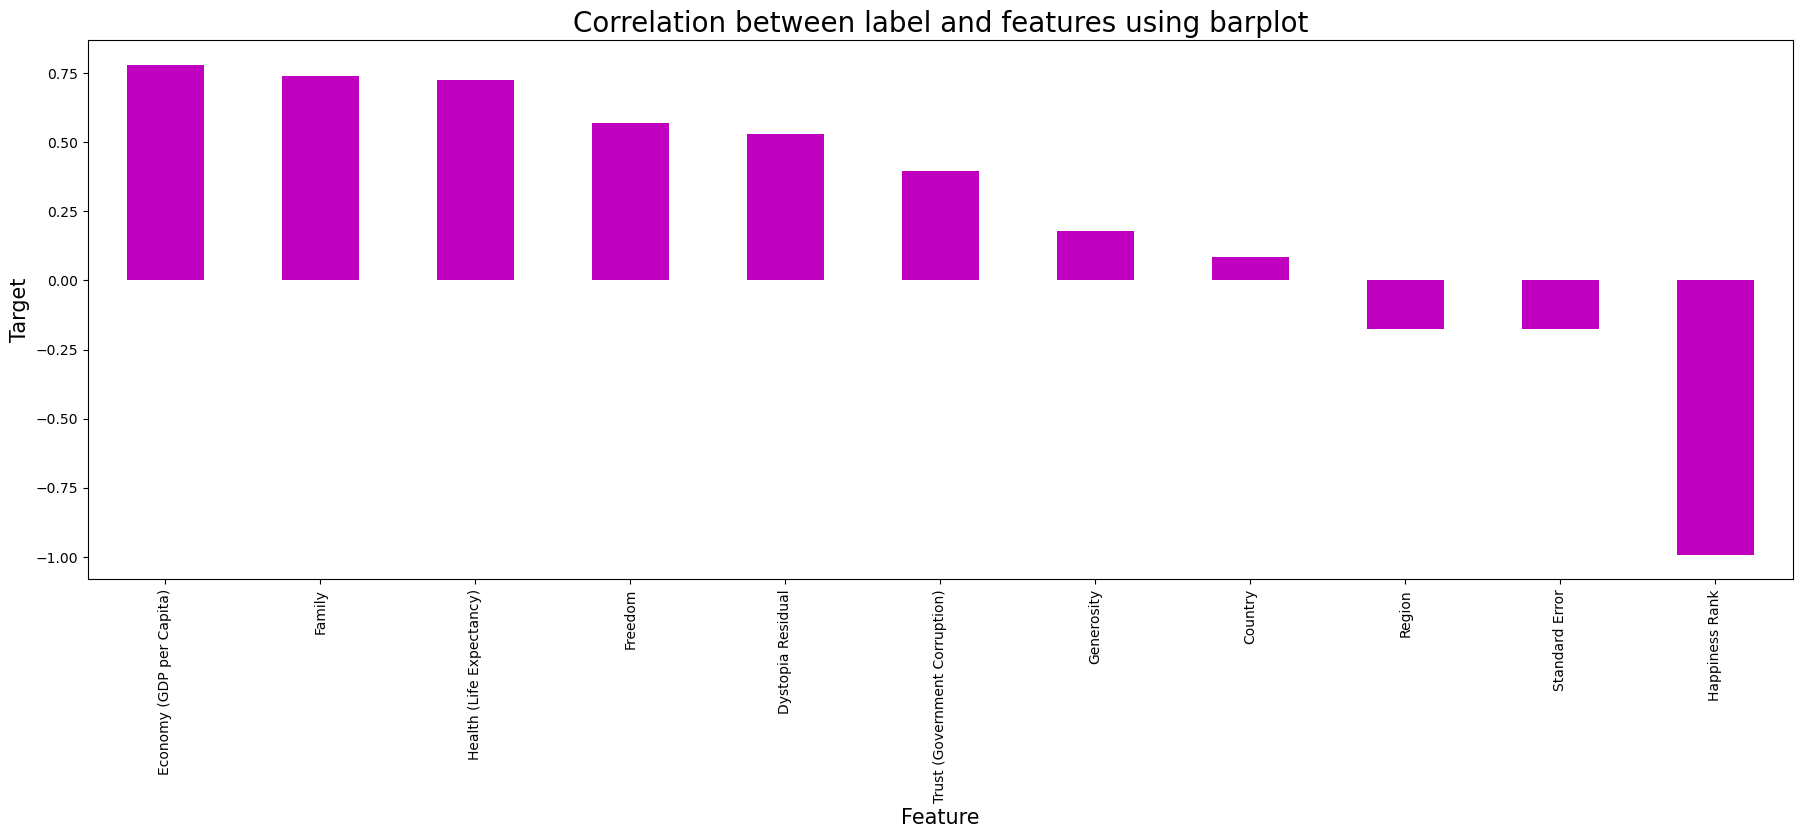

In [27]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

# Checking variance inflation factor

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.072659,Country
1,1.441731,Region
2,59.369423,Happiness Rank
3,1.207035,Standard Error
4,13.440316,Economy (GDP per Capita)
5,4.851988,Family
6,4.815465,Health (Life Expectancy)
7,3.362487,Freedom
8,1.648423,Trust (Government Corruption)
9,2.039876,Generosity


we cannot drop features having multicollinearity because they have high correlation with target

# Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [30]:
maxAccu=0        
maxRS=0           
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print(" Maximum r2 score is",maxAccu,"on random_state",maxRS) 

 Maximum r2 score is 0.9971139767643936 on random_state 71


# creating train test split

In [31]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor

In [33]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("Mean squared error:",mean_squared_error(y_test,pred_lr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score: 0.9971139767643936
R2_score on training Data: 99.40334297827323
Mean absolute error: 0.050150588174192545
Mean squared error: 0.0038414702675609747
Root Mean absolute error: 0.061979595574357976


In [34]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rfr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rfr))
print("Mean squared error:",mean_squared_error(y_test,pred_rfr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 score: 0.9985163185957776
R2_score on training Data: 99.9045341387411
Mean absolute error: 0.03173822222222257
Mean squared error: 0.001974869062222275
Root Mean absolute error: 0.044439498897065374


In [35]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared error:",mean_squared_error(y_test,pred_knn))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: 0.9514179458648622
R2_score on training Data: 93.63315236000356
Mean absolute error: 0.20003555555555552
Mean squared error: 0.06466563199999996
Root Mean absolute error: 0.2542943805906846


In [36]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_gbr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_gbr))
print("Mean squared error:",mean_squared_error(y_test,pred_gbr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 score: 0.9979900720156734
R2_score on training Data: 99.99993666717147
Mean absolute error: 0.03494081702504852
Mean squared error: 0.002675334867879975
Root Mean absolute error: 0.051723639352620726


In [37]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_dtr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared error:",mean_squared_error(y_test,pred_dtr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score: 0.9877949743341409
R2_score on training Data: 100.0
Mean absolute error: 0.08104444444444447
Mean squared error: 0.01624562222222221
Root Mean absolute error: 0.1274583156260203


In [38]:
Lasso=Lasso()
Lasso.fit(x_train,y_train)
pred_Lasso=Lasso.predict(x_test)
pred_train=Lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_Lasso))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_Lasso))
print("Mean squared error:",mean_squared_error(y_test,pred_Lasso))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_Lasso)))

R2 score: 0.10059243298560416
R2_score on training Data: 10.169419044190331
Mean absolute error: 0.9318359457955798
Mean squared error: 1.1971654921133192
Root Mean absolute error: 1.0941505801823255


In [39]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_rd))
print("Mean squared error:",mean_squared_error(y_test,pred_rd))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: 0.9971374361940724
R2_score on training Data: 99.40093301881562
Mean absolute error: 0.050570858241456546
Mean squared error: 0.003810244357633083
Root Mean absolute error: 0.06172717681567077


In [40]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared error:",mean_squared_error(y_test,pred_svr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: 0.960091484908846
R2_score on training Data: 98.63362405556346
Mean absolute error: 0.15675156534631707
Mean squared error: 0.053120630580427874
Root Mean absolute error: 0.23047913263553357


In [41]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2_score on training Data:",r2_score(y_train,pred_train)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared error:",mean_squared_error(y_test,pred_etr))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: 0.9989195366504106
R2_score on training Data: 100.0
Mean absolute error: 0.02852577777777867
Mean squared error: 0.0014381616133333549
Root Mean absolute error: 0.037923101314810144


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_lr)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 36.223474852600724


In [44]:
score1=cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rfr)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 36.36370903573912


In [45]:
score2=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_knn)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 31.65387176264758


In [46]:
score3=cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_gbr)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 36.3110843777287


In [47]:
score4=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_dtr)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 35.29157460957545


In [48]:
score5=cross_val_score(Lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_Lasso)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is -53.42867952527822


In [49]:
score6=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_rd)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 36.225820795568595


In [50]:
score7=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_svr)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 32.52122566704596


In [51]:
score8=cross_val_score(etr,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is',(r2_score(y_test,pred_etr)-score.mean())*100)

[ 0.54841147  0.82316291  0.87956237 -0.0073301   0.93058949]
0.6348792282383864
Difference between R2 score and cross validation score is 36.40403084120242


knn is giving less difference ,so it is best model

# hyperparameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}
gscv=GridSearchCV(KNN(), param_grid=params, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [54]:
gscv.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 7,
 'weights': 'distance'}

In [55]:
final_model=KNN(algorithm = 'auto',
                 leaf_size =20,
                 metric ='manhattan',
                 n_neighbors =7,
                 weights= 'distance' )
final_model.fit(x_train,y_train)
Pred=final_model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root Mean absolute error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.6976462237733907
Mean absolute error: 1.2544857145416326
Mean squared error: 2.2596690882471298
Root Mean absolute error: 1.5032195741963745


# saving the model

In [56]:
import pickle
file="World Happiness Report.pkl"
pickle.dump(final_model,open(file,'wb'))

# predicting by using the saved model

In [57]:
model=pickle.load(open('World Happiness Report.pkl','rb'))

# predictions
prediction=model.score(x_test,y_test)
print(prediction*100)

95.47283485694628


# check how my model is behaving

In [58]:
conclu=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclu

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
Predicted,4.033299,3.903171,5.776881,3.932742,6.289947,5.425364,3.753527,5.001595,4.474871,4.314515,...,5.619195,4.922113,5.833597,3.954659,5.431744,7.01512,3.777185,4.42306,4.501114,7.071044
Original,4.033000,3.956000,5.813000,3.995000,6.455000,5.286000,3.575000,5.007000,4.565000,4.419000,...,5.770000,4.959000,5.833000,3.845000,5.102000,6.90100,3.340000,4.69400,5.057000,6.940000
